In [66]:
import nibabel as nib
ct_img = nib.load("C:/Users/dhruv/Downloads/ProstateX-0000-20221020T145446Z-001/ProstateX-0000/T2W.nii.gz")
mask = nib.load("C:/Users/dhruv/Downloads/ProstateX-0000-20221020T145446Z-001/ProstateX-0000/PM.nii.gz")
print(ct_img.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 384 384  19   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint16
bitpix          : 16
slice_start     : 0
pixdim          : [1.        0.5       0.5       3.0000021 0.        0.        0.
 0.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 1118
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : unknown
quatern_b       : -0.0006202684
quatern_c       : -0.16066043
quatern_d       : 0.9870095
qoffset_x       : 57.685436
qoffset_y       

In [67]:
import numpy as np

def find_pix_dim(ct_img):
    pix_dim = ct_img.header["pixdim"] # example [1,2,1.5,1,1]
    dim = ct_img.header["dim"] # example [1,512,512,1,1]
    max_indx = np.argmax(dim)
    pixdimX = pix_dim[max_indx]
    dim = np.delete(dim, max_indx)
    pix_dim = np.delete(pix_dim, max_indx)
    max_indy = np.argmax(dim)
    pixdimY = pix_dim[max_indy]
    return [pixdimX, pixdimY] # example [2, 1.5]

find_pix_dim(ct_img)

[0.5, 0.5]

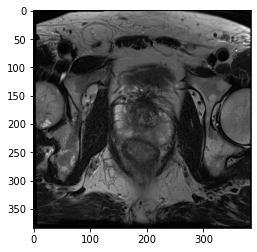

In [68]:
# Original Image

from matplotlib import pyplot as plt

i=8
ct_img_data = np.rot90(ct_img.get_fdata(), 3)
plt.imshow(ct_img_data[:,:,i], cmap='gray')

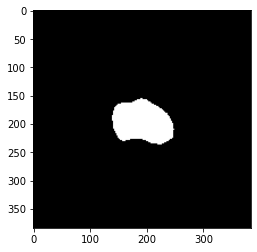

In [69]:
# Mask

mask_data = np.rot90(mask.get_fdata(), 3)
plt.imshow(mask_data[:,:,i], cmap='gray')

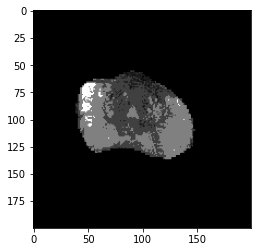

In [70]:
# Mask on Original image overlay

import cv2

result = cv2.bitwise_and(ct_img_data, mask_data)
plt.imshow(result[:,:,i][100:300, 100:300], cmap='gray')

In [71]:
mask_data_8 = (mask_data).astype('uint8')


In [72]:
ret, thresh = cv2.threshold(mask_data_8[:,:,8], 150, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
maskCopy = mask_data_8[:,:,8].copy()
cv2.drawContours(maskCopy, contours, 2, (0, 255, 0), 10)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [73]:
maskCopy.shape

(384, 384)